# Das Räuber-Beute Modell
<i>von Pietro Foggia und Enes Yasaroglu
<br>Alle Aufgaben wurden gemeinsam bearbeitet</i>

# Inhaltsverzeichnis
* ### [Bibliotheken](#chapter1)
* ### [Klasse](#chapter2)
* ### [Aufgaben:](#chapter3)
    * [Aufgabe 1](#section_3_1)
    * [Aufgabe 2](#section_3_2)
    * [Aufgabe 3](#section_3_3)
    * [Aufgabe 4](#section_3_4)
    * [Aufgabe 5](#section_3_5)
    * [Aufgabe 6](#section_3_6)
* ### [Quellenverzeichnis](#chapter4)

## Bibliotheken <a class="anchor" id="chapter1"></a>

In [83]:
from sage.all import ode_solver
import matplotlib.pyplot as plt
import numpy as np

## Klasse <a class="anchor" id="chapter2"></a>

In [84]:
t, u, v = var("t, u, v")

class Lotka:
    """
    Konstruktor, der die Variablen a, b, c, d initialisiert.
    """
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c 
        self.d = d
        
    def Differentialgleichungssystem(self, t, Y):
        """
        Erstellung des Systems der Differtialgleichungen
        """
        u, v = Y
        dudt = self.a * u - self.b * u * v
        dvdt = -self.c * v + self.d * self.b * u * v
        return [dudt, dvdt]
    
    def solver(self, anzahl_beute, anzahl_räuber, t1):
        """
        Lösung des DLG-Systems mit ode_solve
        """
        solver = ode_solver()
        solver.y_0 = [anzahl_beute, anzahl_räuber]
        solver.function = lambda t, Y: self.Differentialgleichungssystem(t, Y)
        solver.ode_solve(t_span=[0, t1], num_points=10000)
        return solver.solution
    
    def solverInterpolation(self, anzahl_beute, anzahl_räuber, t1):
        """
        Interpolation des DLG-Systems mit ode_solve
        """
        solver = ode_solver()
        solver.y_0 = [anzahl_beute, anzahl_räuber]
        solver.function = lambda t, Y: self.Differentialgleichungssystem(t, Y)
        solver.ode_solve(t_span=[0, t1], num_points=10000)
        return solver.interpolate_solution(i=0), solver.interpolate_solution(i=1)
    
    def Plot_Population(self, solver):
        """
        Plot der Popultationen der Jäger und Beute
        """
        plt.figure()
        plt.title("Das Räuber-Beute Modell")
        plt.plot([x[0] for x in solver], [yi[1][0] for yi in solver], label="Beutetiere")
        plt.plot([x[0] for x in solver], [yi[1][1] for yi in solver], label="Räuber")
        plt.xlabel("Zeit t")
        plt.ylabel("Population")
        plt.legend()
        
    def Plot_Vektorfeld(self, u_max, v_max):
        """
        Plot des Vektorfeldes in der Range u_max v_max
        """
        global u, v
        normierter_vektor = np.array([self.a*u - self.b*u*v, - self.c*v + self.d*self.b*u*v])/sqrt((self.a*u - self.b*u*v)^2 + (- self.c*v + self.d*self.b*u*v)^2)
        return plot_vector_field(normierter_vektor,(u, 0, u_max), (v, 0, v_max))
            
    def Plot_Phasendiagramm(u, v, farbe):
        """
        Plot des Phasendiagramms der Variablen u und v
        """
        global t
        return parametric_plot((u, v), (t, 0, 10), aspect_ratio="automatic", thickness=1, color=farbe)


## Aufgaben <a class="anchor" id="chapter3"></a>

### Aufgabe 1 <a class="anchor" id="section_3_1"></a>

* Interpretation der Konstanten $a,b,c,d$
* Erstellung plausibler Werte  für $a,b,c,d$

<em>Die Lotka-Volterra Predator-Prey Model Differentialgleichungen:</em>

\begin{aligned}
\frac{du}{dt} &= a \cdot u(t) - b \cdot u(t) \cdot v(t) \\
\frac{dv}{dt} &= -c \cdot v(t) + d \cdot b \cdot u(t) \cdot v(t)
\end{aligned}

##### Erklärung der Variablen: 

* $\frac{du}{dt}$ Änderung der Population der Beutetiere
* $\frac{dv}{dt}$ Änderung der Population der Raubtiere
* $u(t)$ Anzahl der Beutetiere zum Zeitpunkt $t$
* $v(t)$ Anzahl der Beutetiere zum Zeitpunkt $t$
* <b>$a$ Reproduktionsrate der Beutetiere ohne Störung und bei großem Nahrungsangebot</b>
* <b>$b$ Jagderfolg der Raubtiere pro Beutetiere = Sterberate der Beutetiere pro Räuber </b>
* <b>$c$ Sterberate der Raubtiere, wenn keine Beutetier vorhanden ist </b>
* <b>$d$ Reproduktionsrate der Räuber pro Jagderfolg pro Beutetiere </b>
* $a, b, c, d$ sind positive Konstanten[$^ 1$](#quelle1).

#### Plausible Werte der Konstante $ a, b ,c ,d$

* $a = 1.2$
* $b = 0.2$
* $c = 0.6$
* $d = 0.2$
* $Startwert Beute = 30$
* $Startwert Räuber = 100$

Erläuterunge: siehe [Aufgabe 4](#erläuterung)

### Aufgabe 2 <a class="anchor" id="section_3_2"></a>

* Art des Gleichungssystems 
* Lösbarkeit des Gleichungssystems 

#### Art des Systems

"System aus zwei nicht linearen gekoppelten Differentialgleichungen erster Ordnung."[$ ^1$](#quelle1)

* Die Gleichungen sind von erster Ordnung, da die höchste vorkommende Ableitung vom Grad 1 ist.
* gekoppelt sind die Gleichungen, da sie jeweils von der anderen Variable $u(t)$ und $v(t)$ abhängen.
* Sie sind nicht linear, da $\cdot u(t) \cdot v(t)$ gebildet wird.

##### Lösbarkeit des Systems

Satz von Picard Lindelöf [$ ^2$](#quelle2):

"Formal ausgedrückt besagt der Satz von Picard-Lindelöf, dass wenn die rechte Seite der Differentialgleichung und ihre partielle Ableitung nach der abhängigen Variable stetig sind in einem Bereich um den Anfangswert, dann existiert in diesem Bereich eine eindeutige Lösung für das Anfangswertproblem."

\begin{aligned}
a \cdot u(t) - b \cdot u(t) \cdot v(t) \\
- c \cdot v(t) + d \cdot b \cdot u(t) \cdot v(t)
\end{aligned}

da alle Parameter $a, b, c, d$ und die Startwerte für $u$ und $v$ konstante Zahlen sind, sind auch beide Gleichungen stetig und beschränkt. 

##### Partielle Ableitungen beider Gleichungen nach $u$ und $v$

In [99]:
u, v, a, b, c, d = var("u, v, a, b, c, d")

f = a*u - b*u*v
g = -c*v + d*b*u*v

print(f.diff(u))
print(f.diff(v))
print(g.diff(u))
print(g.diff(v))

-b*v + a
-b*u
b*d*v
b*d*u - c


\begin{aligned}
\frac {\delta}{\delta u} \left(\frac{du}{dt}\right) &= -b \cdot v + a \\
\frac {\delta}{\delta v} \left(\frac{du}{dt}\right) &= -b \cdot u \\
\frac {\delta}{\delta u} \left(\frac{du}{dt}\right) &= b \cdot d \cdot v \\
\frac {\delta}{\delta v} \left(\frac{du}{dt}\right) &= b \cdot d \cdot u - c
\end{aligned}

Bei den partiellen Ableitungn wird analog vorgegangen. <br>Alle vier Gleichungen sind stetige Funktionen. Somit existiert nach Picard-Lindelöf für das Anfangswertproblem eine eindeutige Lösung

### Aufgabe 3 <a class="anchor" id="section_3_3"></a>

* Lösen der DGL´s mit verschiedenen Anfangsbedingungen $u(0), v(0)$ und Konstanten $a, b, c, d$

In [85]:
a = [1.2, 1.5 , 1.2]
b = [0.02, 0.05, 0.02]
c = [0.6, 0.8, 0.6]
d = [0.2, 0.1, 0.4]
start_beute = [30, 100, 150]
start_räuber = [100, 30, 60]
zeit = 25

#### Berechnungen[$ ^3$](#quelle3) der Population  zum Zeitpunkt $t$ mit verschiedenen Anfangsbedingungen $u(t) v(t)$ und Parametern $a, b, c, d$ 

In [86]:
Vorschlag_1 = Lotka(a[0], b[0], c[0], d[0])
Lösung_1 = Vorschlag_1.solver(start_beute[0], start_räuber[0], zeit)

In [87]:
Vorschlag_2 = Lotka(a[1], b[1], c[1], d[1])
Lösung_2 = Vorschlag_2.solver(start_beute[1], start_räuber[1], zeit)

In [88]:
Vorschlag_3 = Lotka(a[0], b[0], c[0], d[0])
Lösung_3 = Vorschlag_3.solver(start_beute[2], start_räuber[2], zeit)

In [89]:
Vorschlag_4 = Lotka(a[2], b[2], c[2], d[2])
Lösung_4 = Vorschlag_4.solver(start_beute[0], start_räuber[0], zeit)

### Aufgabe 4 <a class="anchor" id="section_3_4"></a>

* Erstellung Plot der Population von Räuber und Beute über die Zeit[$ ^4$](#quelle4).

#### Erläuterung der plausible Werten der Konstante $ a, b ,c ,d$ <a class="anchor" id="erläuterung"></a>

\begin{aligned}
\frac{du}{dt} &= a \cdot u(t) - b \cdot u(t) \cdot v(t) \\
\frac{dv}{dt} &= -c \cdot v(t) + d \cdot b \cdot u(t) \cdot v(t)
\end{aligned}




Wie man in der unteren Grafik gut erkennen kann, sinken beide Populationen erstmal, da die Geburtenrate der Beute kleiner der Sterberate der Beute ist  $a \cdot u(t) < b \cdot u(t) \cdot v(t)\\$ (analog : $d \cdot b \cdot u(t) \cdot v(t) < c \cdot v(t) $) Die Räuber-Population sinkt stärker, da sehr wenig Beute zur Verfügung steht. Nachdem der Großteil der Räuber gestorben ist, kann sich die Beute wieder stark vermehren und somit zieht die Bevölkerung der Räuber auch wieder an und dezimiert die Beute wieder.

Man erkennt außerdem, dass sich diese Zyklen wiederholen. Zudem sieht man, dass die Popultaion der Räuber der Popultion der Beute nachläuft.

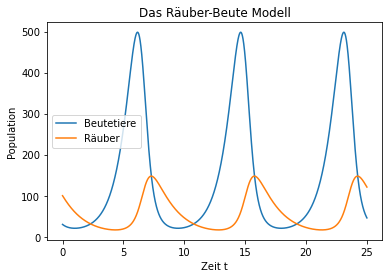

In [90]:
Vorschlag_1.Plot_Population(Lösung_1)

##### Empfindlichkeit des Systems

Bei dieser Gegenüberstellung wurde lediglich der Parameter $d$ um 0.2 erhöht und es entstehen völlig verschiedene Werte.

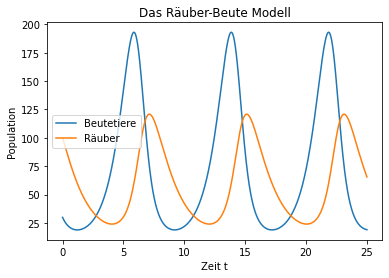

In [91]:
Vorschlag_4.Plot_Population(Lösung_4)

##### weiteres Beispiel

* $a = 1.5$
* $b = 0.05$
* $c = 0.8$
* $d = 0.1$
* $Startwert Beute = 100$
* $Startwert Räuber = 30$

In dem unteren Plot erkennt man, dass die jeweiligen Populationen um einen gewissen Mittelwert schwanken.

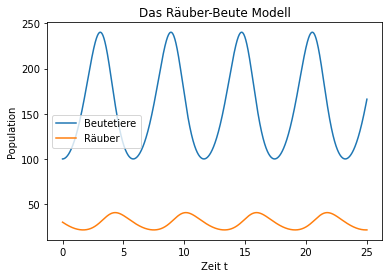

In [92]:
Vorschlag_2.Plot_Population(Lösung_2)

##### Gleichgewicht <a class="anchor" id="gleichgewicht"></a>

* $a = 1.2$
* $b = 0.02$
* $c = 0.6$
* $d = 0.2$
* $Startwert Beute = 150$
* $Startwert Räuber = 60$

ein Gleichgewicht stellt sich bei gegebenen Parametern $a, b, c, d$ ein, wenn man beide Gleichungen nach $0$ auflöst. Somit erhält man:

* $u(t) = \frac {a} {b} = 150$
* $v(t) = \frac {c} {d \cdot b} = 60$

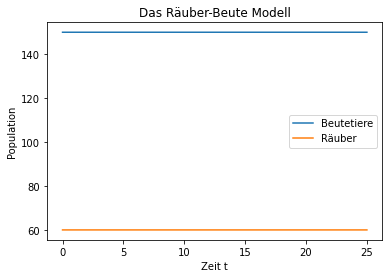

In [93]:
Vorschlag_3.Plot_Population(Lösung_3)

### Aufgabe 5 <a class="anchor" id="section_3_5"></a>

###### Plot der Anzahl Räuber und Beute mit folgenden Konstanten und Startwerten für die drei Ringe im Phasendiagramm [$ ^4$](#quelle4).
* $a = 1.2$
* $b = 0.2$
* $c = 0.6$
* $d = 0.2$

###### Ring 1  
Startwerte:
* 80 Beutetiere und 160 Räuber

###### Ring 2
Startwerte:
* 40 Beutetiere und 80 Räuber

###### Ring 3
Startwerte:
* 20 Beutetiere und 40 Räuber

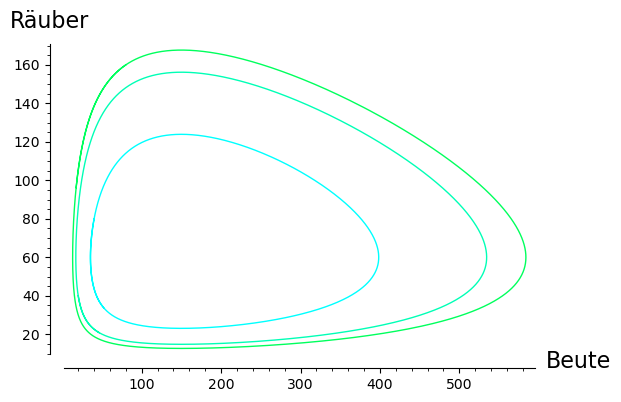

In [100]:
u_func, v_func = Vorschlag_1.solverInterpolation(80, 160, zeit)
Ring_1 = Lotka.Plot_Phasendiagramm(u_func, v_func, "#00FF5D")

u_func, v_func = Vorschlag_1.solverInterpolation(40, 80, zeit)
Ring_2 = Lotka.Plot_Phasendiagramm(u_func, v_func, "#00FFFF")

u_func, v_func = Vorschlag_1.solverInterpolation(20, 40, zeit)
Ring_3 = Lotka.Plot_Phasendiagramm(u_func, v_func, "#00FFB6")

plot = Phase_1 + Phase_2 + Phase_3
plot.axes_labels(["Beute", "Räuber"])
plot

### Aufgabe 6 <a class="anchor" id="section_3_6"></a>

* Erstellung des Vektorfelds [$ ^4$](#quelle4) mit normierten Vektoren und aller möglicher Anfangsbedingungen $u(t) \ v(t)$ aus Aufgabe 5

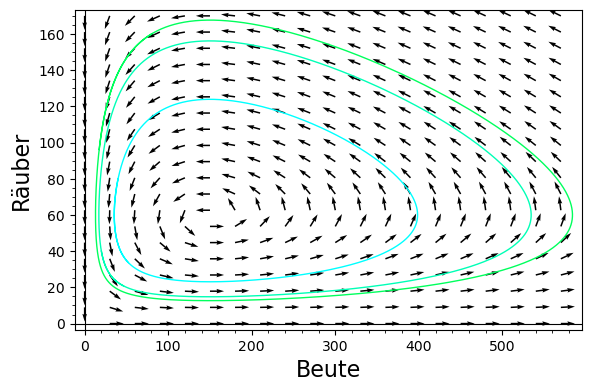

In [95]:
plot += Vorschlag_1.Plot_Vektorfeld(570, 170)
plot.axes_labels(["Beute", "Räuber"])
plot

### Interpretation des Diagramms

Die Vektoren sind die Gradienten an den jeweiligen Koordinaten und zeigen die Steigung der Tangente an, was der Veränderung der jeweilgen Population entspricht.
Das Vektorfeld wird genau durch die zwei Differentialgleichungen von Lotka-Volterra beschrieben.

Der einzelne Vektor ist in der Form [$\frac{du}{dt}$, $\frac{dv}{dt}$] in Beute $u(t)$ und Räuber $v(t)$ Richtung

* $\frac{du}{dt} = 1.2 \cdot u(t) - 0.02 \cdot u(t) \cdot v(t)$
* $\frac{dv}{dt} = -0.6 \cdot v(t) + 0.2 \cdot 0.02 \cdot u(t) \cdot v(t)$


Da die Population zyklisch ist, entstehen im Phasendiagramm geschlossene Linien.
Wenn man entlang der Kreise läuft, erhält man die verschiedenen Populationsstände zu verschiedenen Zeitpunkten $t$.

Hier sieht man das Gleichgewicht:

* $u(t) = \frac {a} {b} = 150$
* $v(t) = \frac {c} {d \cdot b} = 60$

um welches die Verktoren rotieren (siehe [Aufgabe 4](#gleichgewicht)).

Außerdem erkennt man, dass die horizontalen Vektoren bei Beute $= 150 \lor 0$ die Steigung 0 besitzen.
<br>Gleiches gilt für die vertikalen Vektoren bei Räuber $= 60 \lor 0$


## Quellenverzeichnis <a class="anchor" id="chapter4"></a>

* [1] Seite „Lotka-Volterra-Gleichungen“. In: Wikipedia – Die freie Enzyklopädie. Bearbeitungsstand: 22. April 2023, 08:58 UTC. URL: https://de.wikipedia.org/w/index.php?title=Lotka-Volterra-Gleichungen&oldid=233056721 (Abgerufen: 8. Juni 2024, 11:06 UTC) <a id="quelle1"></a> 

* [2] StudySmarter. (o.D.). Satz von Picard-Lindelöf. StudySmarter. https://www.studysmarter.de/studium/mathematik-studium/differentialgleichungen/satz-von-picard-lindeloef/ (abgerufen am 10. Juni 2024).<a id="quelle2"></a> 

* [3]  SageMath. (o.D.). Ordinary differential equations (ODE). In SageMath documentation. https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html#sage.calculus.ode.ode_solver (abgerufen am 10. Juni 2024).<a id="quelle3"></a> 

* [4] SageMath. (o.D.). 2D plotting. In SageMath documentation. https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html# (abgerufen am 10. Juni 2024). <a id="quelle4"></a> 
